In [1]:
import sys
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.optimizers.bassin_hopping import Bassin_Hopper
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_atom_col(N_atoms, grid_size):
    atom_list = []
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos in new_arr:
        atom = Atom(pos)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

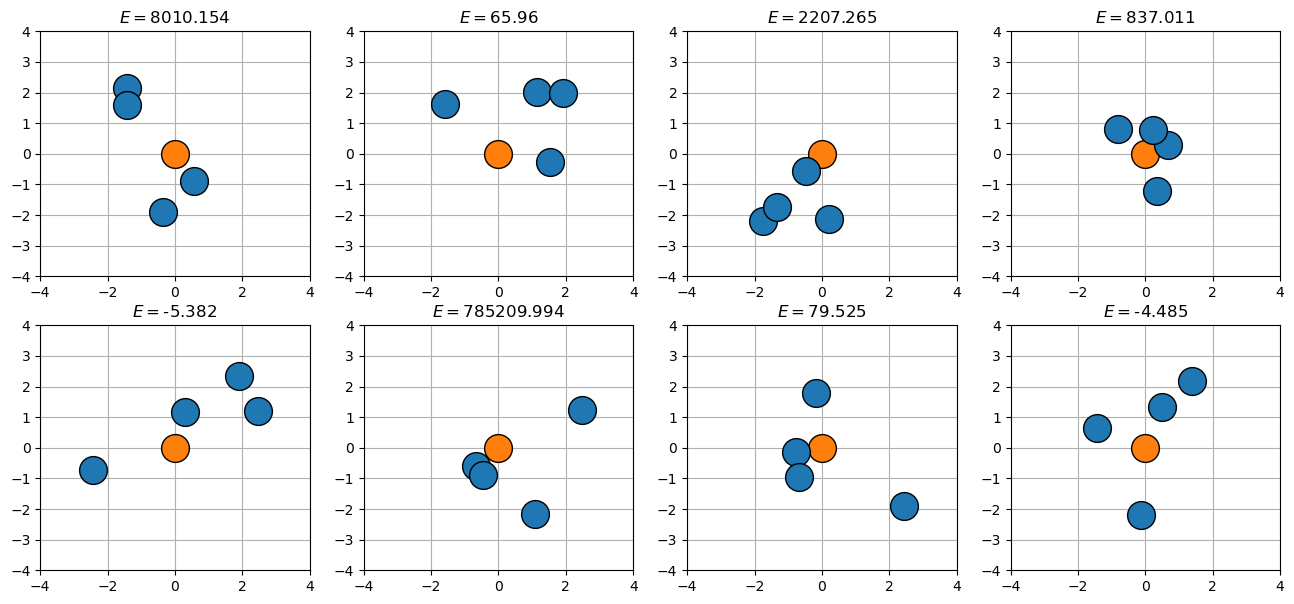

In [5]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_plotter = Atom_Collection_Plotter(markersize=20)
atom_cols = []
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(5, [-2.5,2.5])
    atom_col.calculator = LennardJones()
    atom_plotter(atom_col=atom_col, ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

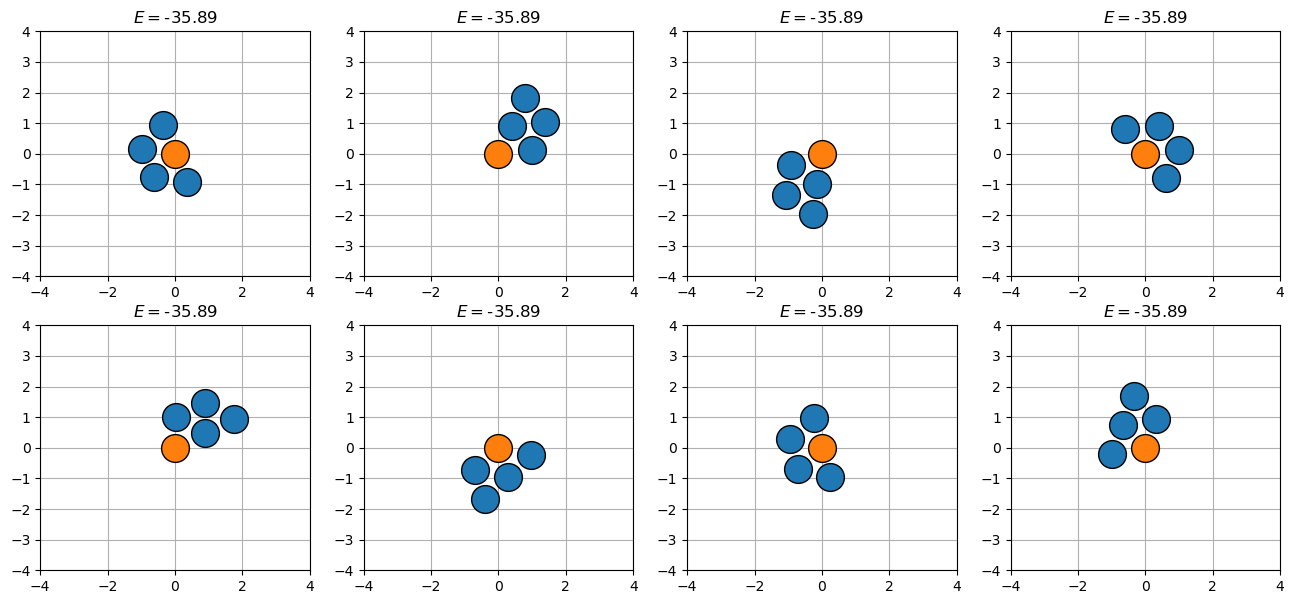

In [6]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Bassin_Hopper(atom_col=atom_col, T=0.15, N_lin_search=400, N_metropol=200)
    optimizer.run(N_max=5, prop_args=(0.2, ), metro_method="single_atom")
    opt_cols.append(optimizer.best_atom_col)
fig, axs = plt.subplots(2,4, figsize=(16,7))
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.calculator = LennardJones()
    atom_plotter(atom_col=opt_col, ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

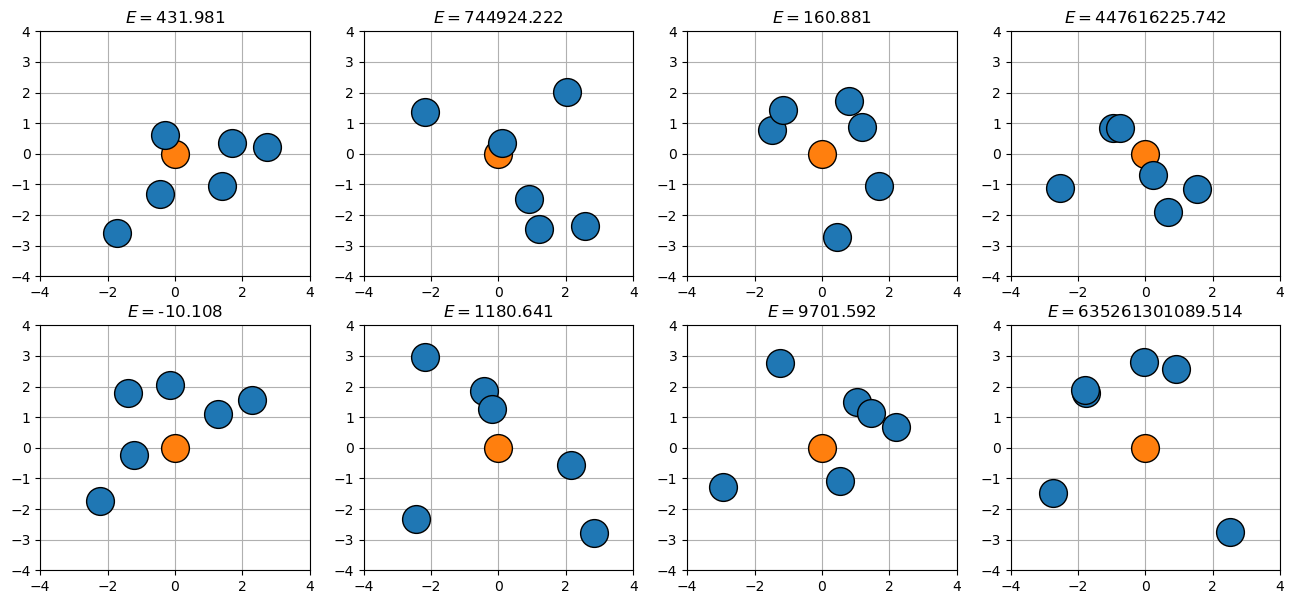

In [11]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_plotter = Atom_Collection_Plotter(markersize=20)
atom_cols = []
N_atoms=7
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.calculator = LennardJones()
    atom_plotter(atom_col=atom_col, ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

c:\Users\karst\Computational-Physics\Week3\exercise 17\../..\classes\optimizers\metropol.py:52: RuntimeWarning: overflow encountered in exp
  acc_prob = np.exp(-(E_new-E_currently)/self.T)


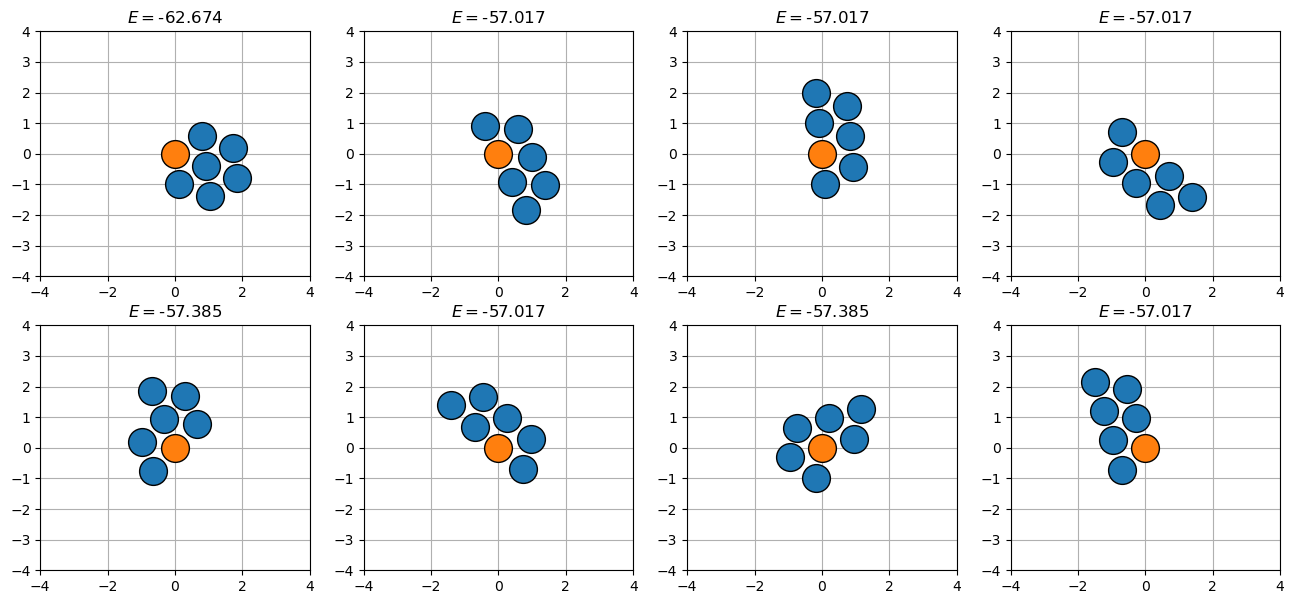

In [12]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Bassin_Hopper(atom_col=atom_col, T=0.05, N_lin_search=400, N_metropol=200)
    optimizer.run(N_max=5, prop_args=(0.2, ), metro_method="single_atom")
    opt_cols.append(optimizer.best_atom_col)
fig, axs = plt.subplots(2,4, figsize=(16,7))
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.calculator = LennardJones()
    atom_plotter(atom_col=opt_col, ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

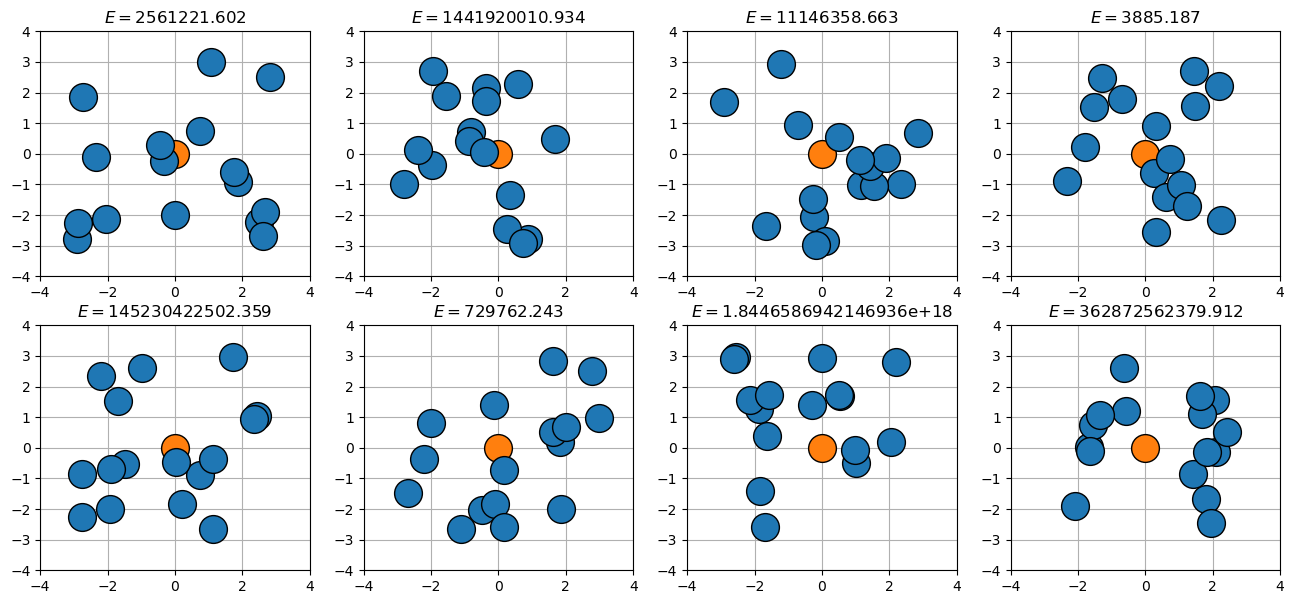

In [13]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_plotter = Atom_Collection_Plotter(markersize=20)
atom_cols = []
N_atoms = 17
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.calculator = LennardJones()
    atom_plotter(atom_col=atom_col, ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

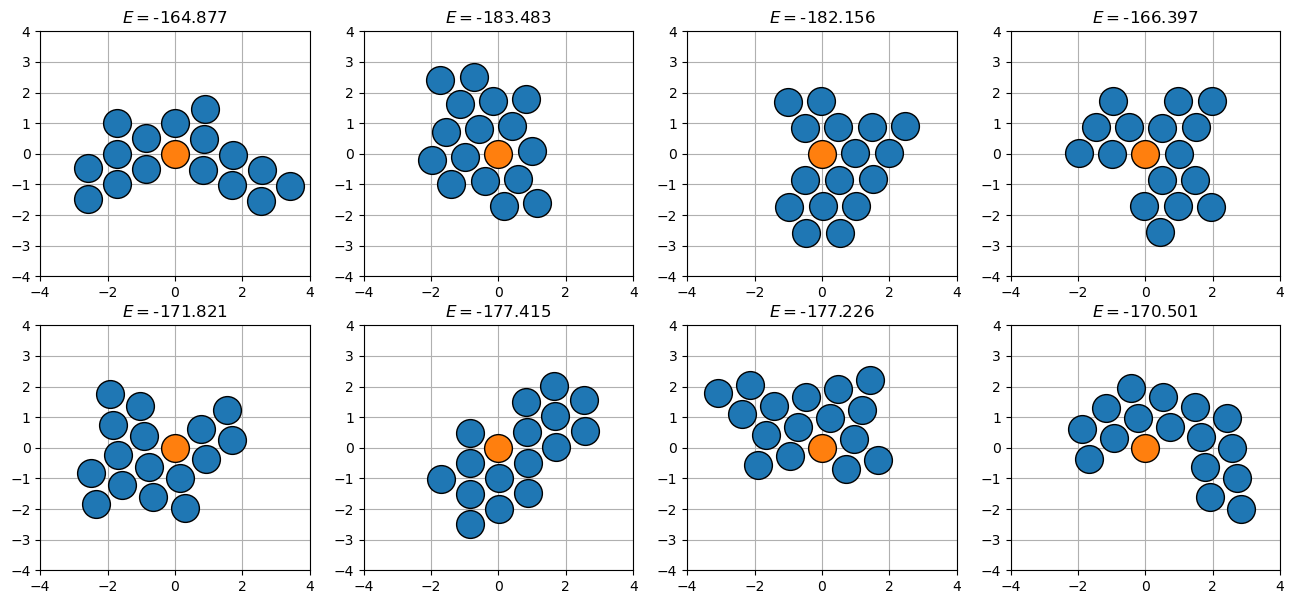

In [14]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Bassin_Hopper(atom_col=atom_col, T=0.10, N_lin_search=400, N_metropol=100)
    optimizer.run(N_max=6, prop_args=(0.2, ), metro_method="single_atom")
    opt_cols.append(optimizer.best_atom_col)
fig, axs = plt.subplots(2,4, figsize=(16,7))
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.calculator = LennardJones()
    atom_plotter(atom_col=opt_col, ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")